In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

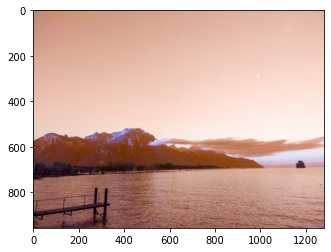

In [9]:
img=cv2.imread('res/mountain-and-lake.jpg')
plt.imshow(img) # openCV loads images as BGR by default so the image looks funny

We can attain the correct image like this:

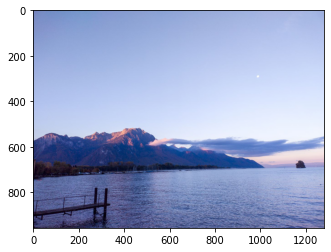

In [10]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [11]:
img.shape

(957, 1280, 3)

In [12]:
img=img.reshape((img.shape[1]*img.shape[0],3))

In [13]:
img.shape

(1224960, 3)

# Clustering


In [14]:
kmeans=KMeans(n_clusters=5)
s=kmeans.fit(img)

Labels

In [15]:
labels=kmeans.labels_
print(labels)
labels=list(labels)

[2 2 2 ... 1 1 1]


Centroids of clusters

In [16]:
centroid=kmeans.cluster_centers_

Calculate cluster allocation

In [17]:
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)

Finally, plot a pie chart showing how much of each cluster centroid is present in the image

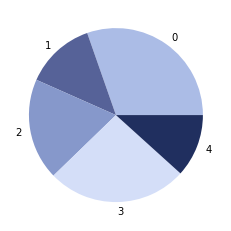

In [18]:
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

That is for a fixed `k`. Use the Elbow method to find the optimal value of `k`.

In [19]:
md=[]
for i in range(1,21):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(img)
  o=kmeans.inertia_
  md.append(o)

Inertia: It is the sum of squared distances of samples to their closest cluster center.

We iterate the values of k from 1 to n and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

Inertia values for each k:

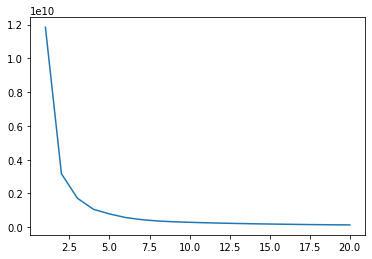

In [20]:
plt.plot(list(np.arange(1,21)),md)
plt.show()

from k=4 onwards there is no significant change in value of inertia so the elbow point is k=4

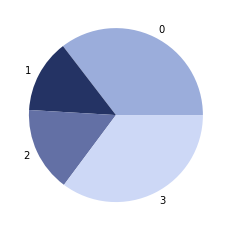

In [21]:
kmeans=KMeans(n_clusters=4)
s=kmeans.fit(img)
labels=kmeans.labels_
centroid=kmeans.cluster_centers_
labels=list(labels)
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

Then, some clusterings:

In [32]:
img=cv2.imread(im_filename)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2=img.reshape((img.shape[1]*img.shape[0],3))

kmeans=KMeans(n_clusters=4)
s=kmeans.fit(img2)
labels=kmeans.labels_
centroid=kmeans.cluster_centers_
labels=list(labels)
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))

NameError: name 'im_filename' is not defined

In [33]:
def draw_im(im_filename):
  img=cv2.imread(im_filename)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img2=img.reshape((img.shape[1]*img.shape[0],3))

  kmeans=KMeans(n_clusters=4)
  s=kmeans.fit(img2)
  labels=kmeans.labels_
  centroid=kmeans.cluster_centers_
  labels=list(labels)
  percent=[]
  for i in range(len(centroid)):
    j=labels.count(i)
    j=j/(len(labels))
    percent.append(j)

  plt.subplot(1,2,1)
  plt.imshow(img)

  plt.subplot(1,2,2)
  plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))


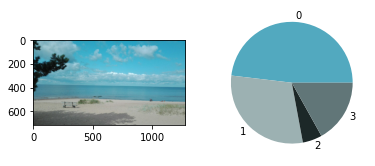

In [34]:
draw_im('res/beach.jpg')

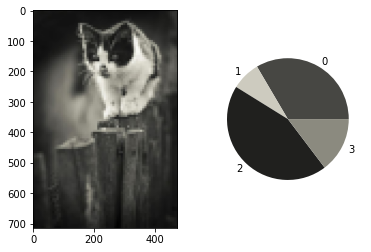

In [35]:
draw_im('res/cat.png')

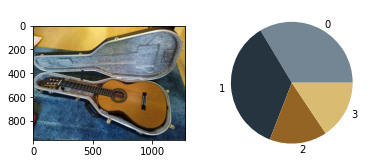

In [36]:
draw_im('res/guitar.jpg')

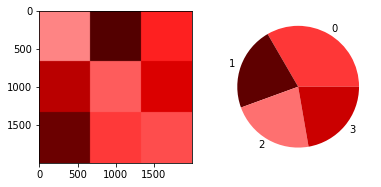

In [37]:
draw_im('res/red-tones.png')

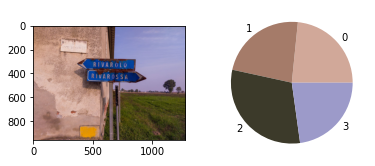

In [38]:
draw_im('res/signs.jpg')

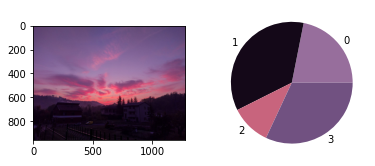

In [39]:
draw_im('res/sunset.jpg')